<a href="https://www.suss.edu.sg/">
   <img src = "https://www.suss.edu.sg/images/default-source/default-album/logo-with-tagline.png" width =200> 

# <center>ANL252</center>
# <center>Python for Data Analytics</center>

# <center>-------------------------------------------------------------------------------------------------</center>

# <center>End-of-Course Assessment</center>
# <center>July 2022 Presentation</center>
# <center>Dr Munish Kumar</center>

# <center>-------------------------------------------------------------------------------------------------</center>

# <center>Name: Tng Ting Xu</center>
# <center>PI Number: K2181584</center>
# <center>Date of Submission: 5 September 2022</center>

## Question 1

#### Categorical Variables: 
1. Gender
2. Education
3. Marital
4. S(n)
5. Rating
6. ID

#### Numeric Variables: 
1. Limit
2. Balance
3. Income
4. Age
5. B(n)
6. R(n)


## Question 2

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Reads data from file
PATH = r"C:\Users\Tng Ting Xu\Desktop\SUSS\Y2S1\ANL252\ECA\ECA_data.csv"
DF = pd.read_csv(PATH)

In [2]:
# To check the dataset
display(DF)

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.000,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.050,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.850,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.300,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.250,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3.0,1.0,39,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18765,18763,150000,294.525,149966,0,0,3.0,2.0,43,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18766,18764,30000,623.875,30327,1,0,2.0,2.0,37,3,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18767,18765,80000,0.000,94607,1,0,3.0,1.0,41,-1,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


### Pre-Procesing Task 1: Removal of Null Values

In [3]:
# Get the sum of null for columns with at least one null value
DF[DF.columns[DF.isnull().any()]].isnull().sum()

EDUCATION    13
MARITAL      38
dtype: int64

In [4]:
# Find out the percentage of null in each column
percent_missing = DF.isnull().sum() * 100 / len(DF)
DF1 = pd.DataFrame({'percent_missing': percent_missing})
display(DF1)

,percent_missing
ID,0.000000
LIMIT,0.000000
BALANCE,0.000000
INCOME,0.000000
RATING,0.000000
GENDER,0.000000
EDUCATION,0.069263
MARITAL,0.202462
AGE,0.000000
S1,0.000000


In [5]:
# Replace null values in the "EDUCATION" and "MARTIAL" columns with modal value since its a categorical numerical
for column in ['EDUCATION', 'MARITAL']:
    DF[column].fillna(DF[column].mode()[0], inplace=True)

# Check to confirm DF is free of NaN values
DF[DF.columns[DF.isnull().any()]].isnull().sum()

Series([], dtype: float64)

### Pre-Processing Task 2: Removal of Abnormal Values Under 'AGE' Column

In [6]:
# First, check for the number of unique values for each column
DF.nunique()

ID           18766
LIMIT           80
BALANCE      14860
INCOME       17701
RATING           2
GENDER           2
EDUCATION        4
MARITAL          3
AGE             59
S1               9
S2              10
S3               9
S4               8
S5               8
B1           14839
B2           14636
B3           14359
B4           14021
B5           13807
R1            5987
R2            5770
R3            5218
R4            5143
R5            5201
dtype: int64

In [7]:
# Shows an overview of unique values in the "AGE" column
np.unique(DF["AGE"])

array([ -1,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  79,  80, 199], dtype=int64)

In [8]:
# Since age cannot be -1 & 199, drop these rows
DF = DF.drop(DF.index[DF["AGE"].isin([-1, 199])])

# Check if rows have been dropped
np.unique(DF["AGE"])

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 79, 80], dtype=int64)

### Pre-Procesing Task 3: Converting columns "EDUCATION", "MARITAL" and "R3" from Object to Int64

In [9]:
# Check the data types
DF.dtypes

ID             int64
LIMIT          int64
BALANCE      float64
INCOME         int64
RATING         int64
GENDER         int64
EDUCATION    float64
MARITAL      float64
AGE            int64
S1             int64
S2             int64
S3             int64
S4             int64
S5             int64
B1             int64
B2             int64
B3             int64
B4             int64
B5             int64
R1             int64
R2             int64
R3            object
R4             int64
R5             int64
dtype: object

In [10]:
# Check for special characters
np.unique(DF["R3"])

array(['$0', '$13,069', '$2,089', ..., '997', '998', '999'], dtype=object)

In [10]:
# Pass them to df.replace() to remove "$" and "," sign
DF['R3'] = DF['R3'].replace({'\$': '', ',': ''}, regex=True)

# Run a check again
np.unique(DF["R3"])

array(['0', '1', '10', ..., '997', '998', '999'], dtype=object)

In [11]:
# Change columns "EDUCATION", "MARITAL" and "R3" from object to int64
DF['EDUCATION'] = DF['EDUCATION'].astype('Int64')
DF['MARITAL'] = DF['MARITAL'].astype('Int64')
DF['R3'] = DF['R3'].astype('float').astype('Int64')

# Run a check
DF.dtypes

ID             int64
LIMIT          int64
BALANCE      float64
INCOME         int64
RATING         int64
GENDER         int64
EDUCATION      Int64
MARITAL        Int64
AGE            int64
S1             int64
S2             int64
S3             int64
S4             int64
S5             int64
B1             int64
B2             int64
B3             int64
B4             int64
B5             int64
R1             int64
R2             int64
R3             Int64
R4             int64
R5             int64
dtype: object

### Pre-Procesing Task 4: Removing Duplicated Rows

In [12]:
# To check for duplicates
DF_duplicates = DF.duplicated().sum()
print('Number of Duplicates')
print(DF_duplicates)

Number of Duplicates
3


In [13]:
# Use the DataFrame.duplicated() method to check for duplicate values using 'ID' column as unique identifier
DF[DF.duplicated(['ID'], keep = False)]

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
131,132,200000,1270.675,188181,0,1,2,1,40,-1,...,32333,12610,7850,977,9205,13587,7850,0,9205,0
132,132,200000,1270.675,188181,0,1,2,1,40,-1,...,32333,12610,7850,977,9205,13587,7850,0,9205,0
378,378,240000,39804.975,256476,0,1,2,2,35,0,...,232729,223431,226361,223508,238587,10000,8000,9000,19000,9000
379,378,240000,39804.975,256476,0,1,2,2,35,0,...,232729,223431,226361,223508,238587,10000,8000,9000,19000,9000
421,420,30000,1883.700,32877,1,1,1,2,23,2,...,10454,11862,12104,12351,8000,2000,242,247,2000,0
422,420,30000,1883.700,32877,1,1,1,2,23,2,...,10454,11862,12104,12351,8000,2000,242,247,2000,0


In [14]:
# Drop duplicate rows
DF.drop_duplicates(inplace = True)

# To check if duplicates have been removed
DF_duplicates = DF.duplicated().sum()
print('Number of Duplicates')
print(DF_duplicates)

Number of Duplicates
0



## Question 3

In [15]:
# Copy over and rename dataframe
DF_CLEAN = DF.copy()

### Relevant Insight 1: Income by Gender

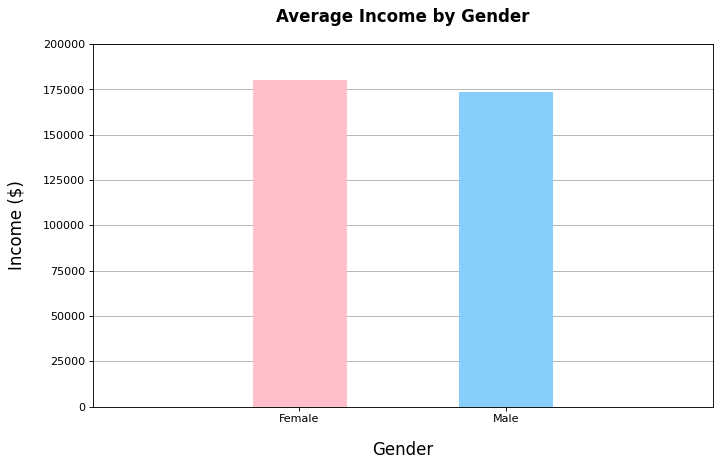

In [16]:
# Define the plot settings
COL = "INCOME"
TITLE = "Average Income by Gender"
Y_LABEL = "Income ($)"
X_LABEL = "Gender"

gen_dict = { "0":"Male", "1":"Female"}

df_dict = {
    "Gender":DF_CLEAN["GENDER"].unique(),
    "Income":[]
}
tmp = []

# Prepare data for plotting
for gen in df_dict["Gender"]:
  df_gen = DF_CLEAN[DF_CLEAN["GENDER"]==gen]
  df_dict["Income"] = df_dict["Income"] + [round(df_gen["INCOME"].mean(), 2)]
  tmp.append(gen_dict[str(gen)])

df_dict["Gender"] = tmp

# Plot & create figure
ax = plt.figure(figsize=(10, 6), dpi=80)

# Plot the bars
plt1 = plt.bar(df_dict["Gender"], df_dict["Income"], width = 0.45, zorder=3)

# Change colours
plt1[0].set_color('pink')
plt1[1].set_color('lightskyblue')

# Change the current limits of both x and y axis
plt.ylim(0, 200000)
plt.xlim(-1, 2)

# Plot the display settings for bar plots
plt.ylabel(Y_LABEL, labelpad=15, fontsize=15)
plt.xlabel(X_LABEL, labelpad=15, fontsize=15)
plt.grid(True, which="Major", axis='y')
plt.title(label = TITLE, pad=20, fontsize=15, weight='bold')
plt.show()

### Insight 2: Average Credit Balance by Educational Level

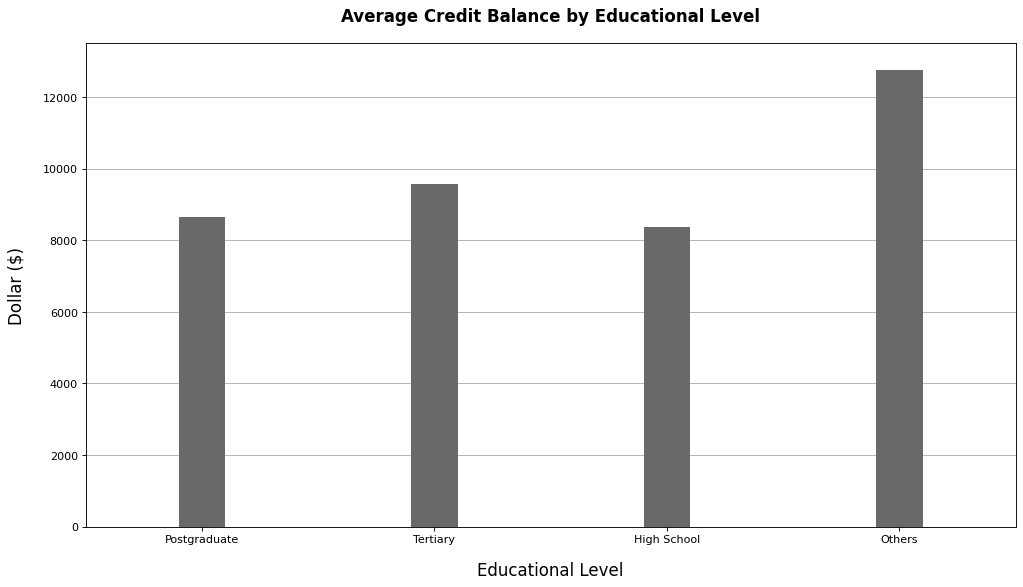

,Education,Average_Balance
0,Postgraduate,8662.20
1,Tertiary,9581.33
2,High School,8366.04
3,Others,12756.65


In [17]:
# Create title and labels
TITLE = "Average Credit Balance by Educational Level"
Y_LABEL = "Dollar ($)"
X_LABEL = "Educational Level"

# Create dict
df_dict = {
  "Education": DF_CLEAN["EDUCATION"].unique(),
  "Average_Balance":[]
}

edu_dict = {
    "0":"Others",
    "1":"Postgraduate",
    "2":"Tertiary",
    "3":"High School"
}
tmp = []
for edu in df_dict["Education"]:
  df_dict["Average_Balance"] = df_dict["Average_Balance"] + [round(DF_CLEAN[DF_CLEAN["EDUCATION"]==edu]["BALANCE"].mean(),2)]
  tmp.append(edu_dict[str(edu)])

df_dict["Education"] = tmp

# Create figure
ax = plt.figure(figsize=(15, 8), dpi=80)

# Plot bars
plt1 = plt.bar(df_dict["Education"], df_dict["Average_Balance"], width = 0.2, zorder=3, color='dimgrey')

# Change the current limits of both x and y axis
plt.ylim(0, 13500)
plt.xlim(-0.5, 3.5)

# Plot the display settings for bar plots
plt.ylabel(Y_LABEL,labelpad=15,fontsize=15)
plt.xlabel(X_LABEL,labelpad=15,fontsize=15)
plt.grid(True,which="Major",axis='y')

# Plot settings
plt.title(label=TITLE, pad=20, fontsize=15, weight='bold')

plt.show()

# Display Data
pd.DataFrame(df_dict)

### Insight 3: Repayment Amount by Marital Status

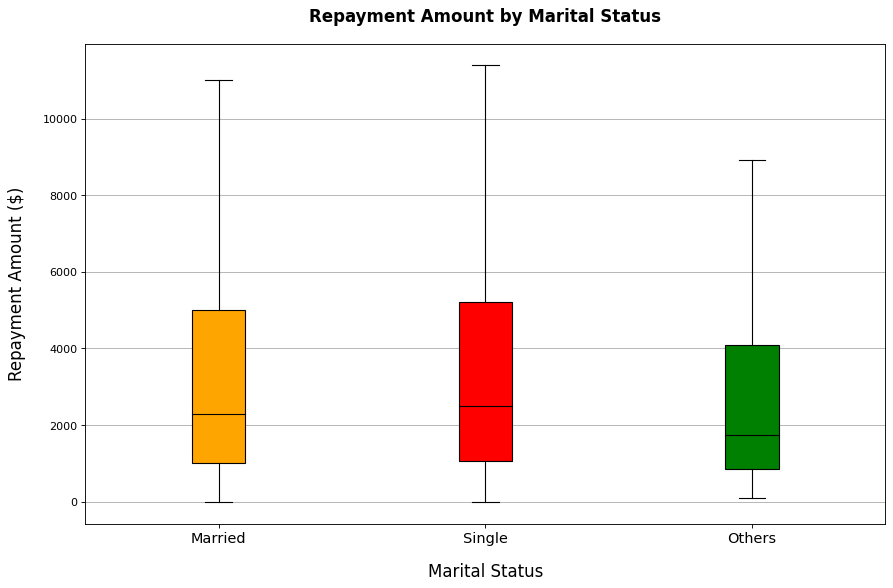

In [18]:
# Define plot settings
TITLE = "Repayment Amount by Marital Status"
Y_LABEL = "Repayment Amount ($)"
X_LABEL = "Marital Status"

legend_dict = {
    '0':"Others",
    '1':"Single",
    '2':"Married"
}

df_dict = {
    "Marital_status":DF_CLEAN["MARITAL"].unique(),
    "Repayment":[],
    "Mean":[]
}
legend = []
for idx,mar in enumerate(df_dict["Marital_status"]):
  tmp_df = DF_CLEAN[DF_CLEAN["MARITAL"]==mar]
  for i in range(1,6): tmp_list = list(tmp_df[~tmp_df['R'+str(i)].isin([-1,0])]['R'+str(i)])
  df_dict["Mean"] = df_dict["Mean"] + [np.array(tmp_list).mean()]
  legend.append(legend_dict[str(mar)])

  if idx == 0: tmp = [tmp_list]
  else: tmp.append(tmp_list)

df_dict["repayment"] = tmp
data = df_dict["repayment"]
df_dict["Marital_status"] = legend

# Data plottings
fig_sz = (10,6)
ax = plt.figure(figsize=fig_sz, dpi=80).add_axes([0, 0, 1, 1])
bp = ax.boxplot(data,patch_artist=True,whis=1.5,showfliers=False,widths=0.2)

# Boxplot settings
for i,T in enumerate(DF_CLEAN["MARITAL"].unique()):
  if i == 0: bp["boxes"][i].set_facecolor("orange")
  elif i == 1: bp["boxes"][i].set_facecolor("red")
  else: bp["boxes"][i].set_facecolor("Green")
  bp["medians"][i].set_color('black')

# Chart settings
plt.title(label=TITLE,pad=20,fontsize=15,weight='bold')
plt.ylabel(Y_LABEL,labelpad=15,fontsize=15)
plt.xlabel(X_LABEL,labelpad=15,fontsize=15)
plt.xticks([1,2,3],labels=df_dict["Marital_status"],fontsize=13)
plt.grid(True,which="Major",axis='y')
plt.show()

### Insight 4: Delayed Payments by Age

C:\Users\716910\AppData\Local\Temp\1\ipykernel_14196\3717961515.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interested["S_Total"] = df_interested["S1"] + df_interested["S2"] + df_interested["S3"] + df_interested["S4"] + df_interested["S5"]


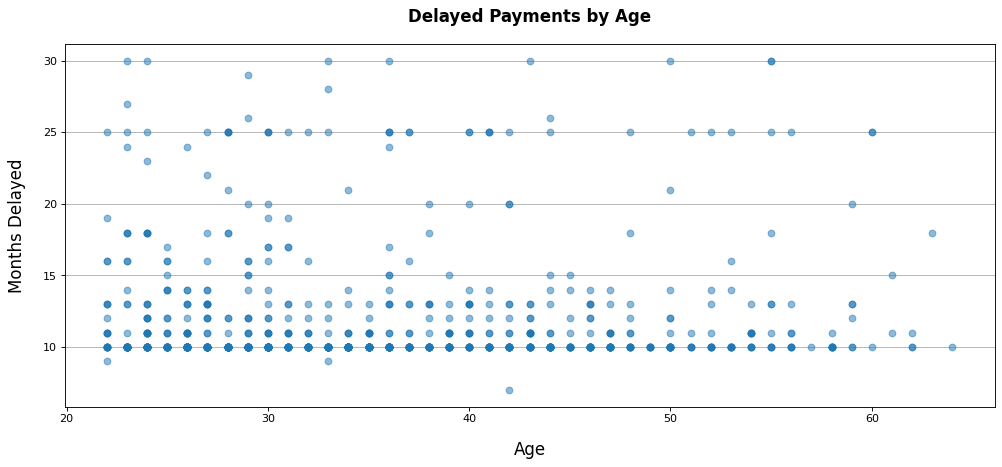

In [20]:
# Define plot settings
TITLE = "Delayed Payments by Age"
Y_LABEL = "Months Delayed"
X_LABEL = "Age"

df_interested = DF_CLEAN[(DF_CLEAN["S1"]>0)&(DF_CLEAN["S2"]>0)&(DF_CLEAN["S3"]>0)&(DF_CLEAN["S4"]>0)&(DF_CLEAN["S5"]>0)]
df_interested["S_Total"] = df_interested["S1"] + df_interested["S2"] + df_interested["S3"] + df_interested["S4"] + df_interested["S5"] 

plt.figure(figsize=(15, 6), dpi=80)
X = df_interested["AGE"]
Y = df_interested["S_Total"]
plt.scatter(X,Y,zorder=3,alpha=0.5)

# Plot settings
plt.title(label=TITLE,pad=20,fontsize=15,weight='bold')
plt.xlabel(X_LABEL,labelpad=15,fontsize=15)
plt.ylabel(Y_LABEL,labelpad=15,fontsize=15)
plt.grid(True,which="Major",axis='y')
plt.show()

### Insight 5: Age Spread Grouped by Gender

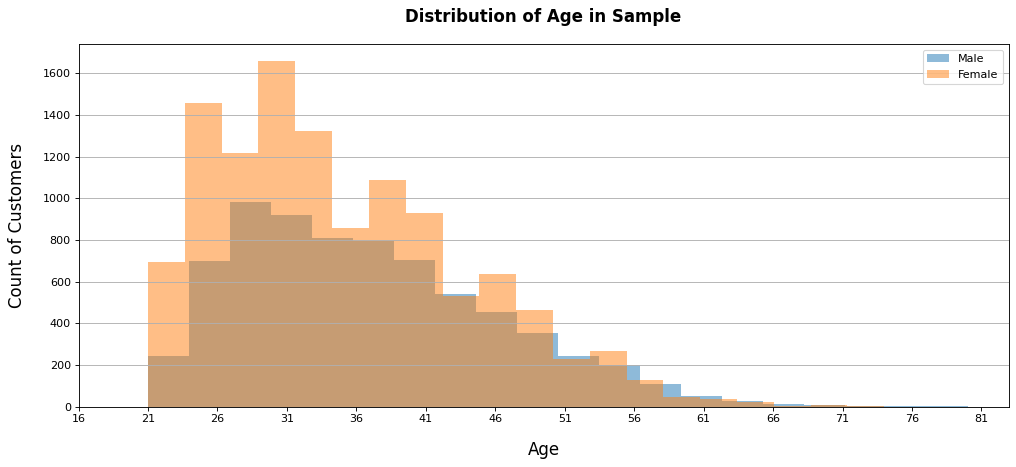

In [21]:
# Define plot settings
BINS = 20
COL = "AGE"
TITLE = "Distribution of Age in Sample"
Y_LABEL = "Count of Customers"
X_LABEL = "Age"

gen_dict = { "0":"Male", "1":"Female"}

# Create figures and plot histograms
plt.figure(figsize=(15, 6), dpi=80)

for gen in [0,1]:
  df_tmp = DF_CLEAN[DF_CLEAN["GENDER"]==gen]
  DAT = df_tmp[COL]
  plt.hist(DAT,alpha=0.5,bins = BINS,label=gen_dict[str(gen)])

# Plot settings
plt.title(label=TITLE,pad=20,fontsize=15,weight='bold')
plt.xlabel(X_LABEL,labelpad=15,fontsize=15)
plt.ylabel(Y_LABEL,labelpad=15,fontsize=15)
plt.xticks([i for i in range(int(DF_CLEAN[COL].min())-5,int(DF_CLEAN[COL].max()+5),5)])
plt.legend()
plt.grid(True,which="Major",axis='y')
plt.show()


## Question 4

In [22]:
# Creation of Correlation Matrix
cor_mat = DF_CLEAN.corr()

# Correlation rankings
# 1st row will always have 100% correlation with itself
# Full Correlation rankings
cor_mat.sort_values(by=["B1"],ascending=False)["B1"]

B1           1.000000
BALANCE      0.950885
B2           0.939005
B3           0.894164
B4           0.853458
B5           0.824070
LIMIT        0.279476
INCOME       0.277372
R5           0.187239
R4           0.145382
R3           0.144877
R2           0.124793
S1           0.116328
R1           0.113953
S2           0.111645
S4           0.090657
S5           0.088766
S3           0.084994
AGE          0.057451
ID           0.016897
EDUCATION   -0.011115
MARITAL     -0.011988
RATING      -0.015495
GENDER      -0.033734
Name: B1, dtype: float64

Available columns are: ['ID', 'LIMIT', 'BALANCE', 'INCOME', 'RATING', 'GENDER', 'EDUCATION', 'MARITAL', 'AGE', 'S1', 'S2', 'S3', 'S4', 'S5', 'B1', 'B2', 'B3', 'B4', 'B5', 'R1', 'R2', 'R3', 'R4', 'R5']


Please Enter Column to perform linear regression with B1:  BALANCE


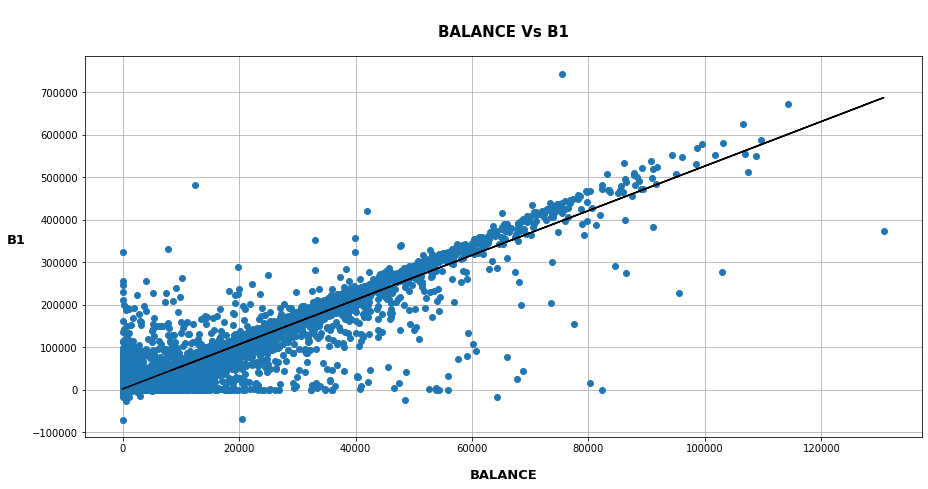

In [23]:
# import LinearRegression library
from sklearn.linear_model import LinearRegression

# Preparation of data to be fed to the linear regression model
# Y values: B1
# X values: BALANCE 

while True:
  print("Available columns are:",list(DF_CLEAN.columns))
  x_col = input("Please Enter Column to perform linear regression with B1: ")   # Allows user input to change desired column to do linear regression with B1 here
  if x_col not in DF_CLEAN.columns: print("Please Enter value column")
  else: break

X = DF_CLEAN[[x_col]]
Y = DF_CLEAN['B1']

# Perform linear regression
# Creates the base of the linear regression model
linear_regressor = LinearRegression()

# Feeds data into model & prediction
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

# Plot the regression model and its variables
plt.figure(figsize=[15, 7])

# Plot data from desired column against B1
plt.scatter(X, Y,zorder=3)

# Plot the predicted values from regression model
plt.plot(X, Y_pred, color='black',zorder=3)                         

# Plot settings
plt.title('\n'+x_col+" Vs B1",fontsize=15,weight='bold',pad=20)
plt.xlabel(x_col,fontsize=13,weight='bold',labelpad=15)
plt.ylabel("B1",fontsize=13,weight='bold',rotation=0,labelpad=15)
plt.grid(True)

# Plot the graph
plt.show()

Available columns are: ['ID', 'LIMIT', 'BALANCE', 'INCOME', 'RATING', 'GENDER', 'EDUCATION', 'MARITAL', 'AGE', 'S1', 'S2', 'S3', 'S4', 'S5', 'B1', 'B2', 'B3', 'B4', 'B5', 'R1', 'R2', 'R3', 'R4', 'R5']


Please Enter Column to perform linear regression with B1:  GENDER


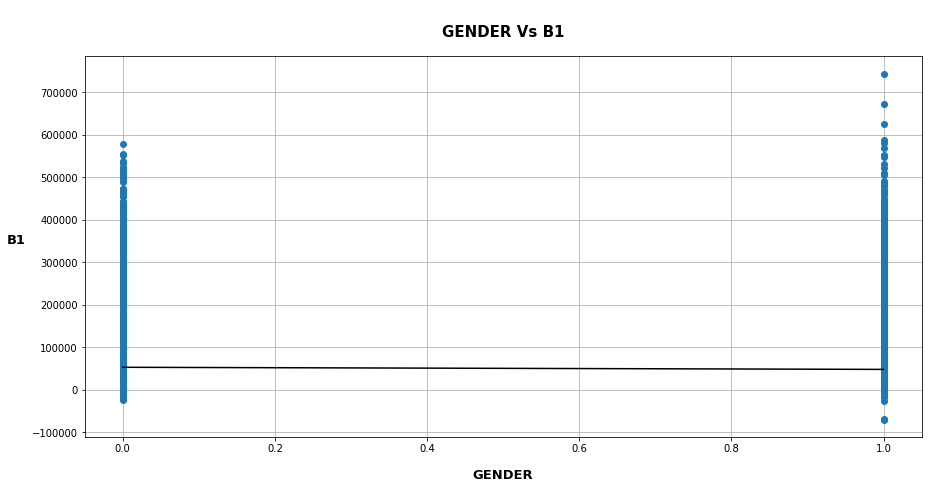

In [28]:
# import LinearRegression library
from sklearn.linear_model import LinearRegression

# Preparation of data to be fed to the linear regression model
# Y values: B1
# X values: BALANCE 

while True:
  print("Available columns are:",list(DF_CLEAN.columns))
  x_col = input("Please Enter Column to perform linear regression with B1: ")   # Allows user input to change desired column to do linear regression with B1 here
  if x_col not in DF_CLEAN.columns: print("Please Enter value column")
  else: break

X = DF_CLEAN[[x_col]]
Y = DF_CLEAN['B1']

# Perform linear regression
# Creates the base of the linear regression model
linear_regressor = LinearRegression()

# Feeds data into model & prediction
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

# Plot the regression model and its variables
plt.figure(figsize=[15, 7])

# Plot data from desired column against B1
plt.scatter(X, Y,zorder=3)

# Plot the predicted values from regression model
plt.plot(X, Y_pred, color='black',zorder=3)                         

# Plot settings
plt.title('\n'+x_col+" Vs B1",fontsize=15,weight='bold',pad=20)
plt.xlabel(x_col,fontsize=13,weight='bold',labelpad=15)
plt.ylabel("B1",fontsize=13,weight='bold',rotation=0,labelpad=15)
plt.grid(True)

# Plot the graph
plt.show()


## Question 5

In [24]:
# Gets Parameters from linear regression model and display it
r_sq = round(linear_regressor.score(X, Y), 3)
M    = round(linear_regressor.coef_[0], 2)
C    = round(linear_regressor.intercept_,2)
print("Accuracy (R^2):", r_sq)
print("Linear Regression Equation: Y =", M, "X +", C)

Accuracy (R^2): 0.904
Linear Regression Equation: Y = 5.24 X + 2171.31


### Key Insights Observed:

1. Customers with a higher bank balance have the tendency to pay off more of what they owe within the first bill. This can be seen by the number of data points recorded above the best fit line as the balance amount increases.

2. Females are observed to pay off more of what they owe within the first bill as compared to Males. This can be seen from the “Gender vs B1” regression model where there are a higher number of data points recorded under (1) which represents the Female customers.

3. Based on the correlation rankings, “Gender”, “Credit Rating”, “Marital” and “Education” were observed to have negative correlation with B1. This indicates that the first bill amount (B1) is unlikely to be determined by these variables and should not be used in the regression model.